In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Badanie założenia o normalności rozkładu

Histfit: histogram z naniesionym fitem rozkładu normalnego

mu_1 = 0.021 sigma_1 = 0.989
mu_2 = 0.038 sigma_2 = 1.132
mu = -0.007 sigma = 0.566


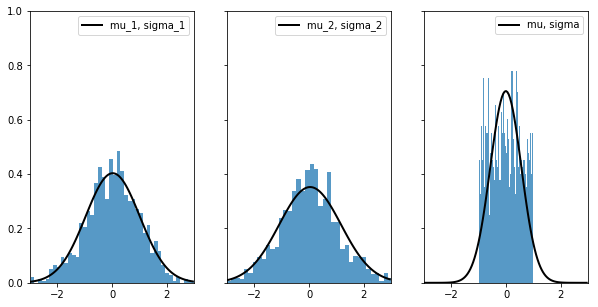

In [14]:
n=1000
# definiowanie statystyk rozkładów 
ud=stats.uniform(-1,2)
nd=stats.norm()
td=stats.t(7)
# losowanie prpbek
data_u=ud.rvs(n)
data_n=nd.rvs(n)
data_t=td.rvs(n)

# podział na 50 przedziałów
N_bins=50

# fitowanie rozkładu (dopasowywanie parametrow)
t = np.arange(-3, 3, 0.05)

mu_1, sigma_1 = stats.norm.fit(data_n)
mu_2, sigma_2 = stats.norm.fit(data_t)
mu, sigma = stats.norm.fit(data_u)

print('mu_1 =',np.round(mu_1,3),'sigma_1 =',np.round(sigma_1,3))
print('mu_2 =',np.round(mu_2,3),'sigma_2 =',np.round(sigma_2,3))
print('mu =',np.round(mu,3),'sigma =',np.round(sigma,3))

fig, axs = plt.subplots(1,3, sharey=True, figsize=(10,5))

axs[0].hist(data_n, N_bins, density=True, alpha=0.75)
axs[0].set_xlim(-3,3)
axs[0].set_ylim(0,1)
axs[0].plot(t, stats.norm.pdf(t,mu_1, sigma_1), 'k-', lw=2, label='mu_1, sigma_1')
axs[0].legend()
# axs[0].title('fittowany normalny')

axs[1].hist(data_t, N_bins, density=True, alpha=0.75)
axs[1].set_xlim(-3,3)
axs[1].set_ylim(0,1)
axs[1].plot(t, stats.norm.pdf(t,mu_2, sigma_2), 'k-', lw=2, label='mu_2, sigma_2')
axs[1].legend()
# axs[1].title('fittowany t-studenta')


axs[2].hist(data_u, N_bins, density=True, alpha=0.75)
axs[2].set_xlim(-3,3)
axs[2].set_ylim(0,1)
axs[2].plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='mu, sigma')
axs[2].legend()
# axs[2].title('fittowany uniform')

plt.show()



# Normplot

Jest to wykres wartości w próbie, względnie prawdopodobieństwa uzyskania takiej wartości w rozkładzie normalnym (wyjątkowy przypadek QQ-Plot). Wykres ten jest szczególnym przypadkiem kwantylowego wykresu prawdopodobieństwa. Konstruuje się go następująco:

<ul>
<li> Na osi pionowej odkładamy uporządkowane zaobserwowane wartości $x_1 \le x_2 \le \dots \le x_n$. Estymują one położenie kwantyli w populacji. </li> 
<li> Na osi poziomej odkładamy położenia kwantyli w rozkładzie normalnym. Obliczamy je: $F^{-1}\left(\frac{i-r_{pop}}{n+n_{pop}} \right)$ gdzie $F^{-1}$ jest funkcją odwrotną do dystrybuanty rozkładu teoretycznego (w tym szczególnym przypadku normalnego) i jest numerem obserwacji, a $r_{pop}$, $n_{pop}$ są czynnikami ($\le 0.5 $) zapewniającymi, że argument funkcji odwrotnej do dystrybuanty nie przyjmuje wartości $0$ ani $1$. </li> 
</ul>

Jeśli dane $x$ podlegają rozkładowi normalnemu, to położenia ich kwantyli powinny być zgodne z położeniami kwantyli w rozkładzie normalnym, zatem wykres powinien przedstawiać linię prostą. Odstępstwa od prostej świadczą o odstępstwie od rozkładu normalnego.


In [15]:
def normplot(x):
    '''normplot: x dane do testowania'''
    x_ord = sorted(x)
    N = len(x)
    y = np.zeros(N)
    y[0]=stats.norm.ppf(1- 0.5**(1.0/N) )
    y[N-1] = stats.norm.ppf(0.5**(1.0/N) )
    for i in range(1,N-1):
        arg = float(i-0.3175)/(N+0.365)
        y[i] = stats.norm.ppf(arg)
    plt.plot(y,x_ord,'.')

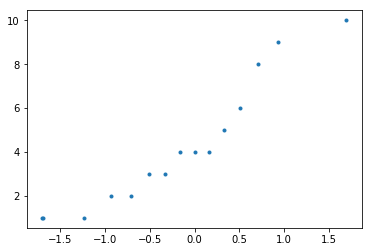

In [17]:
a = [5,2,1,1,4,8,3,3,6,4,4,2,1,9,10]
normplot(a)

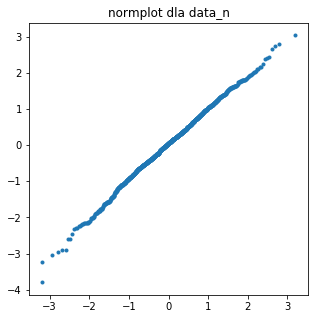

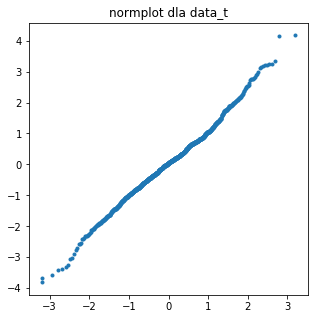

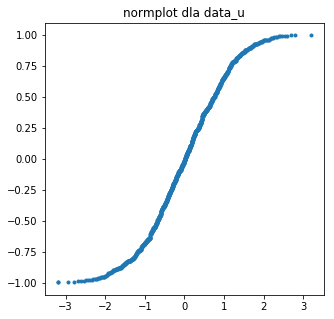

In [20]:
plt.figure(figsize=(5,5))
normplot(data_n)
plt.title('normplot dla data_n')
plt.show()


plt.figure(figsize=(5,5))
normplot(data_t)
plt.title('normplot dla data_t')
plt.show()

plt.figure(figsize=(5,5))
normplot(data_u)
plt.title('normplot dla data_u')
plt.show()

# QQ-Plot
Q w QQ-Plot oznacza kwantyl. Na wykresie kwantyle określonego zbioru danych są zaznaczane na podstawie kwantyli rozkładu referencyjnego, zazwyczaj standardowego rozkładu normalnego.

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


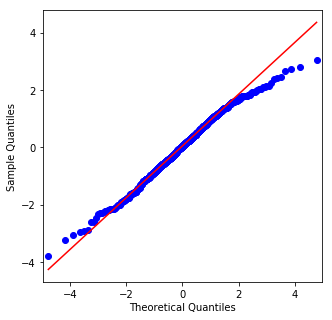

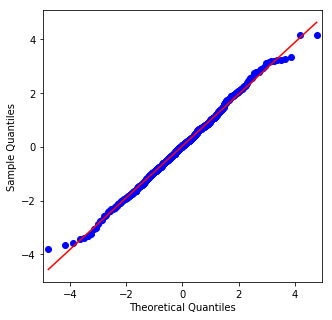

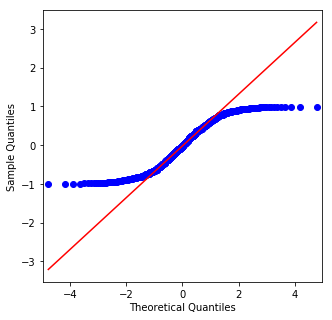

In [24]:
import statsmodels.api as sm
plt.rc("figure", figsize=(5,5))
# rozkład t-studenta
sm.qqplot(data_n, stats.t, distargs=(7,), line='q')
sm.qqplot(data_t, stats.t, distargs=(7,), line='q')
sm.qqplot(data_u, stats.t, distargs=(7,), line='q')
plt.show()

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


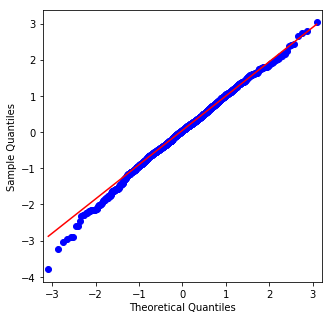

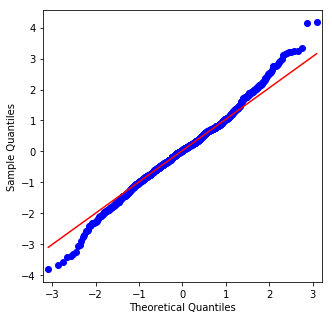

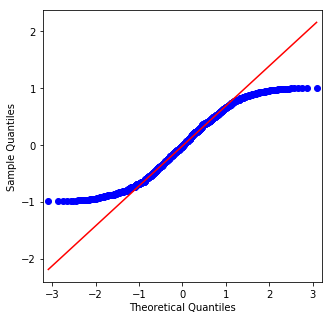

In [26]:
import statsmodels.api as sm
plt.rc("figure", figsize=(5,5))
# rozkład normalny
sm.qqplot(data_n, stats.norm, line='q')
sm.qqplot(data_t, stats.norm, line='q')
sm.qqplot(data_u, stats.norm, line='q')
plt.show()

# PP-Plot
Na wykresie przedstawiona jest dystrybuanta CDF (dystrybuanta empiryczna dla zbioru danych) oraz dystrybuanta CDF rozkładu referencyjnego.

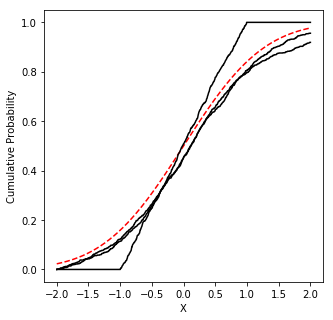

In [27]:
numPts = 1000
lowerLim = -2
upperLim = 2

nd_x = np.linspace(lowerLim, upperLim, numPts)
nd_y = nd.cdf(nd_x)
    
# Empirical CDF of the sample data, which range for approximately 0 to 10

ecdf_x = np.linspace(lowerLim, upperLim, numPts)
ecdf_y = stats.cumfreq(data_n, numPts, (lowerLim, upperLim))[0]/len(data_n)
ecdf_y1 = stats.cumfreq(data_t, numPts, (lowerLim, upperLim))[0]/len(data_t)
ecdf_y2 = stats.cumfreq(data_u, numPts, (lowerLim, upperLim))[0]/len(data_u)
        
plt.plot(nd_x, nd_y, 'r--')
plt.plot(ecdf_x, ecdf_y, color='k')
plt.plot(ecdf_x, ecdf_y1, color='k')
plt.plot(ecdf_x, ecdf_y2, color='k')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.show()

# Probability Plots
Na wykresie przedstawiona jest posortowana próbka w odniesieniu do kwantyli rozkładu referencyjnego.

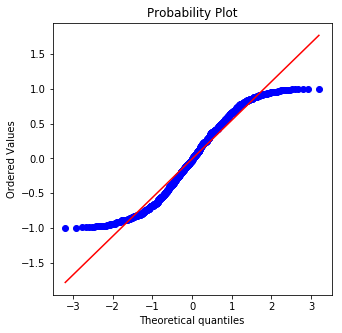

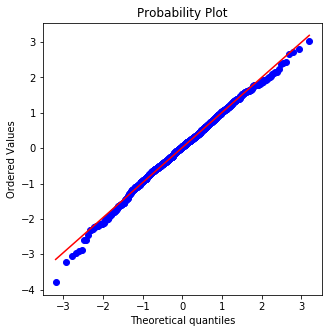

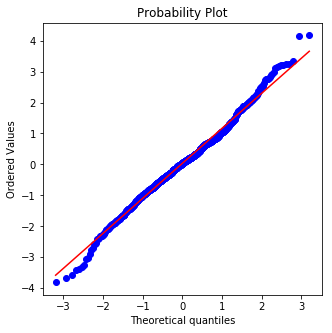

In [28]:
plt.rc("figure", figsize=(5,5))
stats.probplot(data_u, plot=plt)
plt.show()
stats.probplot(data_n, plot=plt)
plt.show()
stats.probplot(data_t, plot=plt)
plt.show()

# Zadanie 1

Zaimportuj dane <tt>datasets.boston</tt> i sprawdż graficznie, które z kolumn (<tt>boston.data</tt>) mają rozkład normalny.


In [44]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]
boston.data.shape

print(boston.data)
print(data[0:15])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[4.09   4.9671 4.9671 6.0622 6.0622 6.0622 5.5605 5.9505 6.0821 6.5921
 6.3467 6.2267 5.4509 4.7075 4.4619]


C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


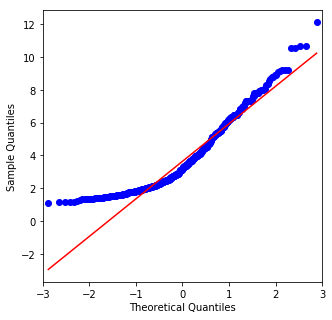

In [45]:
import statsmodels.api as sm
plt.rc("figure", figsize=(5,5))
sm.qqplot(data, stats.norm, line='q')
plt.show()

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


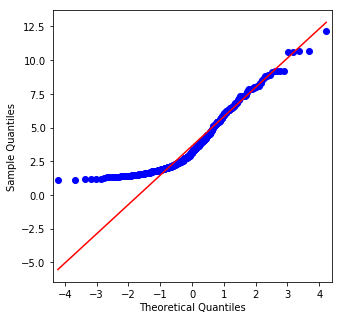

In [46]:
plt.rc("figure", figsize=(5,5))
sm.qqplot(data, stats.t, distargs=(7,), line='q')
plt.show()

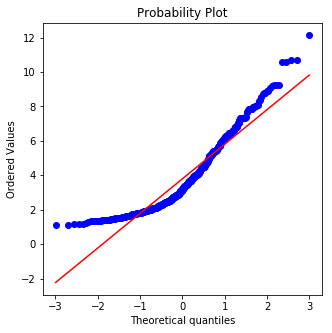

In [47]:
plt.rc("figure", figsize=(5,5))
stats.probplot(data, plot=plt)
plt.show()